# K Means Clustering Algorithm with Python


# Step 1: Importing the libraries

In [157]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Step 2:  Reading the dataset 

In [3]:
# This dataset was obtained from Kaggle and contains all transactions that occurred between
# 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail
# The dataset has 541909 rows and the link to the dataset is as follows
# https://www.kaggle.com/datasets/ersany/online-retail-dataset

In [158]:
data = pd.read_excel(r'C:\Users\pbhal\Downloads\Online Retail.xlsx')

In [159]:
retail = pd.DataFrame(data)
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [160]:
retail.describe()

# 'Quantity' and 'UnitPrice' are the numerical features. Have to process Customer ID to remove the leading Zeros

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [161]:
retail.count()

InvoiceNo      541909
StockCode      541909
Description    540455
Quantity       541909
InvoiceDate    541909
UnitPrice      541909
CustomerID     406829
Country        541909
dtype: int64

# Step 3: Handling Missing values

# Part 3A: Checking the missing values in dataset

In [162]:
retail.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

# Part 3B: Treating the variable "Description" and "Customer ID" for the missing values

In [163]:
retail['Description'].fillna(value= 'Description for this invoice is not available' , inplace=True)
retail['CustomerID'].fillna(value= '00000', inplace=True)

In [164]:
#Checking if there are still missing values in the dataset
retail.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

# Step 4: Treating the column 'Customer ID'

In [165]:
#Checking the data type of customerID column
print(type(retail['CustomerID']))

#Converting the series data type to integer
retail['CustomerID']= retail['CustomerID'].astype(int)
retail.head()

<class 'pandas.core.series.Series'>


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


# Step 5: Exploring the retail dataset

In [166]:
retail[['Quantity', 'UnitPrice']].describe()

,Quantity,UnitPrice
count,541909.000000,541909.000000
mean,9.552250,4.611114
std,218.081158,96.759853
min,-80995.000000,-11062.060000
25%,1.000000,1.250000
50%,3.000000,2.080000
75%,10.000000,4.130000
max,80995.000000,38970.000000


[Text(0.5, 0, ''),
 Text(0, 0.5, 'Quantity'),
 Text(0.5, 1.0, 'Plotting Quantity to check for outliers')]

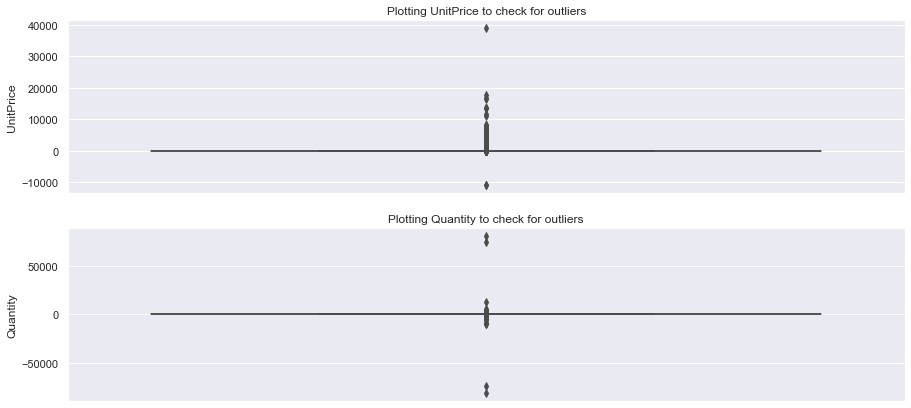

In [167]:
#Plotting BOX PLOT to check the outliers

sns.set(font_scale = 1.0)
fig , axes = plt.subplots(2)
fig.set_size_inches(15,7)

sns.boxplot(data=retail, y='UnitPrice', orient='v', ax= axes[0])
sns.boxplot(data=retail, y='Quantity', orient='v', ax= axes[1])

axes[0].set(ylabel='UnitPrice',title="Box Plot On UnitPrice");
axes[1].set(ylabel='Quantity',title="Box Plot On Quantity");
axes[0].set(xlabel='', ylabel='UnitPrice',title="Plotting UnitPrice to check for outliers")
axes[1].set(xlabel='', ylabel='Quantity',title="Plotting Quantity to check for outliers")


<AxesSubplot:>

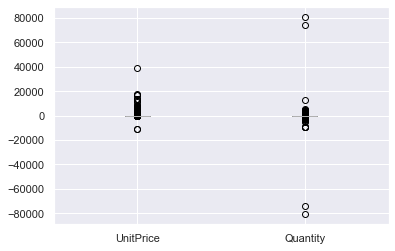

In [168]:
retail[['UnitPrice', 'Quantity']].boxplot()

# Step 6: Treating the inconsistent data in the data set as "Quantity" and "UnitPrice" contains invalid data , i.e. having negative value

In [169]:
retail[retail['UnitPrice']<0]=0
retail[retail['Quantity']<0]=0

retail.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,541909.000000
mean,10.446365,3.822501,11230.621876
std,155.292426,35.526911,6913.249694
min,0.000000,0.000000,0.000000
25%,1.000000,1.250000,0.000000
50%,3.000000,2.080000,14290.000000
75%,10.000000,4.130000,16221.000000
max,80995.000000,13541.330000,18287.000000


# Step 7: Performing K-Means and getting y_pred

(541909, 8)

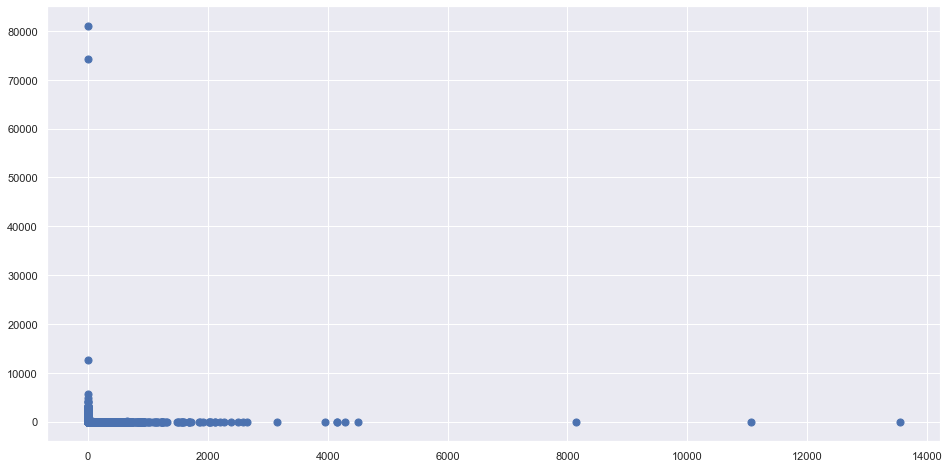

In [170]:
#Checking the scatterplot graph for UnitPrice and Quantity
plt.figure(figsize=(16,8))
plt.scatter(retail['UnitPrice'], retail['Quantity'], s=50)

#checking the shape of dataset
retail.shape

# Applying K-means method to determine the Within sum of square(WSS)

In [172]:
SSE = []
K = range(1, 11)
for k in K:
    kMeanModel = KMeans(n_clusters=k)
    kMeanModel.fit(retail[['UnitPrice','Quantity']])
    SSE.append(kMeanModel.inertia_)
    

# Plotting the WSS against the different values for k

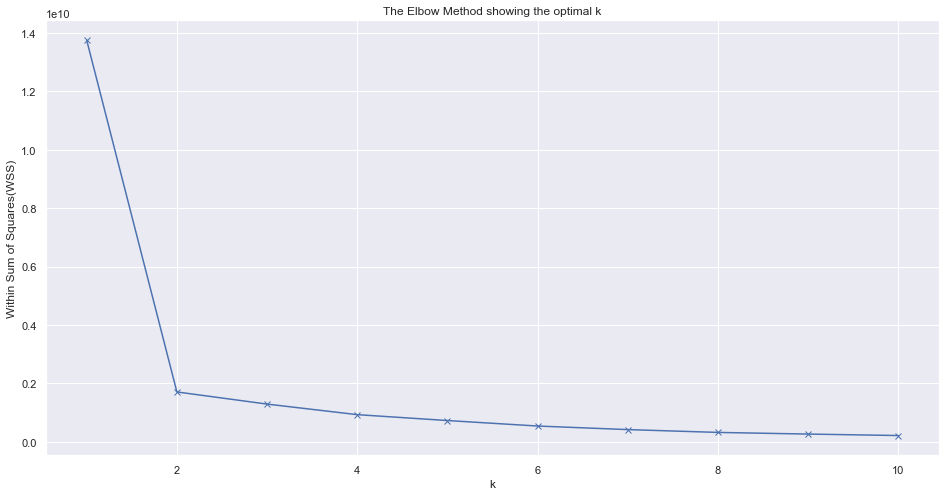

In [173]:
plt.figure(figsize=(16,8))
plt.plot(K, SSE, 'bx-')
plt.xlabel('k')
plt.ylabel('Within Sum of Squares(WSS)')
plt.title('The Elbow Method showing the optimal k')
plt.show()

# Fitting the K-mean model with value of k as 2

In [174]:
kmeanModel = KMeans(n_clusters=2)
kmeanModel.fit(retail[['UnitPrice','Quantity']])

KMeans(n_clusters=2)

In [175]:
#Checking the centroids of the clusters
centroids = kmeanModel.cluster_centers_
centroids

array([[3.82250950e+00, 1.01599887e+01],
       [1.56000000e+00, 7.76050000e+04]])

In [176]:
retail['k_mean']= kMeanModel.predict(retail[['UnitPrice','Quantity']])
retail.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,k_mean
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,0
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850,United Kingdom,0
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850,United Kingdom,0
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850,United Kingdom,0
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850,United Kingdom,0
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047,United Kingdom,0


# Plotting the Clusters with k= 2

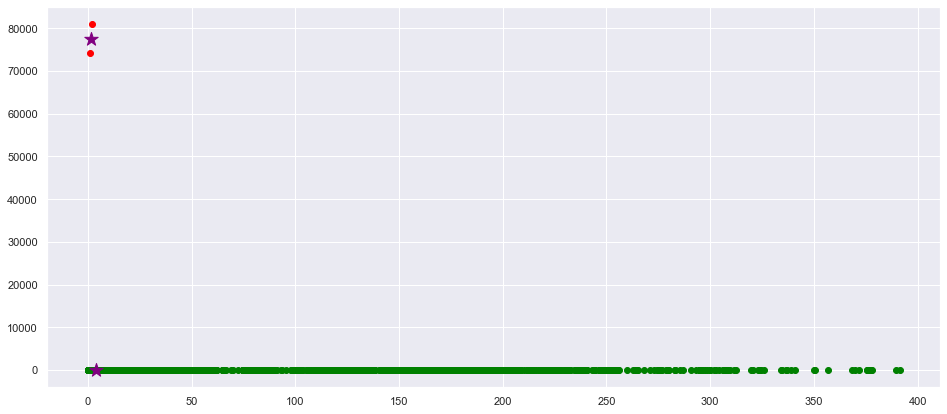

In [177]:
plt.figure(figsize=(16,7))

retail1 = retail[retail.k_mean==0]
retail2 = retail[retail.k_mean==1]

plt.scatter(retail1.UnitPrice, retail1['Quantity'], color='green')
plt.scatter(retail2.UnitPrice, retail2['Quantity'], color='red')
plt.scatter(centroids[:,0], centroids[:,1], color='purple', marker='*', label='centroid', s=200) 
plt.show()

# Step 8 Calculating silhoute score

In [178]:
silhouette_score(retail[['UnitPrice','Quantity']], retail['k_mean'])

0.8987669411676685

In [180]:
kmeanModel.inertia_

1710612538.5204248